<a href="https://colab.research.google.com/github/notArnab/Sign_Language_Detection/blob/main/IndianHandSignDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: isl_data_grey_split/train/u/148.png  
  inflating: isl_data_grey_split/train/u/149.png  
  inflating: isl_data_grey_split/train/u/152.png  
  inflating: isl_data_grey_split/train/u/153.png  
  inflating: isl_data_grey_split/train/u/154.png  
  inflating: isl_data_grey_split/train/u/156.png  
  inflating: isl_data_grey_split/train/u/157.png  
  inflating: isl_data_grey_split/train/u/158.png  
  inflating: isl_data_grey_split/train/u/159.png  
  inflating: isl_data_grey_split/train/u/16.png  
  inflating: isl_data_grey_split/train/u/160.png  
  inflating: isl_data_grey_split/train/u/161.png  
  inflating: isl_data_grey_split/train/u/163.png  
  inflating: isl_data_grey_split/train/u/164.png  
  inflating: isl_data_grey_split/train/u/166.png  
  inflating: isl_data_grey_split/train/u/167.png  
  inflating: isl_data_grey_split/train/u/168.png  
  inflating: isl_data_grey_split/train/u/169.png  
  inflating: isl_data_grey_split

In [2]:
import pandas as pd
import PIL
import os
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from IPython.display import display, Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
project_name = 'Indian_Hand_Sign_Detection'

# List of models
model_names = [
    'VGG16_Transfer_Learning',
    'ResNet50_Transfer_Learning'
]


base_dir = '/content/isl_data_grey_split'

# Create the project directory
project_dir = os.path.join(base_dir, project_name)
os.makedirs(project_dir, exist_ok=True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok=True)


print(f'Project directory structure created at: {project_dir}')

Project directory structure created at: /content/isl_data_grey_split/Indian_Hand_Sign_Detection


In [7]:
# Initialize dictionaries to hold the counts
counts = {
    'train': {},
    'test': {}
}

# Function to count images in each subdirectory
def count_images_in_directory(directory):
    label_counts = {}
    total_count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            image_count = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            label_counts[label] = image_count
            total_count += image_count
    return label_counts, total_count

# Count images in train, test, and validation directories
for folder in ['train', 'test']:
    folder_path = os.path.join(base_dir, folder)
    counts[folder]['label_counts'], counts[folder]['total_count'] = count_images_in_directory(folder_path)

# Print the results
for folder in ['train', 'test']:
    print(f"Folder: {folder}")
    print(f"Total images: {counts[folder]['total_count']}")
    print("Images per label:")
    for label, count in counts[folder]['label_counts'].items():
        print(f"  {label}: {count}")
    print()

Folder: train
Total images: 19483
Images per label:
  4: 240
  m: 240
  g: 960
  6: 240
  s: 960
  j: 960
  1: 240
  r: 240
  b: 720
  0: 523
  t: 960
  w: 960
  h: 960
  f: 240
  y: 960
  k: 960
  5: 240
  q: 240
  e: 240
  z: 960
  x: 960
  8: 240
  p: 240
  o: 240
  9: 240
  2: 240
  u: 240
  7: 240
  a: 240
  n: 240
  d: 960
  v: 960
  l: 960
  c: 240
  3: 240
  i: 960

Folder: test
Total images: 4872
Images per label:
  4: 60
  m: 60
  g: 240
  6: 60
  s: 240
  j: 240
  1: 60
  r: 60
  b: 181
  0: 131
  t: 240
  w: 240
  h: 240
  f: 60
  y: 240
  k: 240
  5: 60
  q: 60
  e: 60
  z: 240
  x: 240
  8: 60
  p: 60
  o: 60
  9: 60
  2: 60
  u: 60
  7: 60
  a: 60
  n: 60
  d: 240
  v: 240
  l: 240
  c: 60
  3: 60
  i: 240



In [8]:
def count_files_in_subdirs(directory, set_name):
    # Initializing an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterating over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Checking if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/isl_data_grey_split/train'
test_dir = '/content/isl_data_grey_split/test'

# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


         4    m    g    6    s    j    1    r    b    0  ...    u    7    a  \
train  240  240  960  240  960  960  240  240  720  523  ...  240  240  240   

         n    d    v    l    c    3    i  
train  240  960  960  960  240  240  960  

[1 rows x 36 columns]
       4   m    g   6    s    j   1   r    b    0  ...   u   7   a   n    d  \
test  60  60  240  60  240  240  60  60  181  131  ...  60  60  60  60  240   

        v    l   c   3    i  
test  240  240  60  60  240  

[1 rows x 36 columns]


<Axes: >

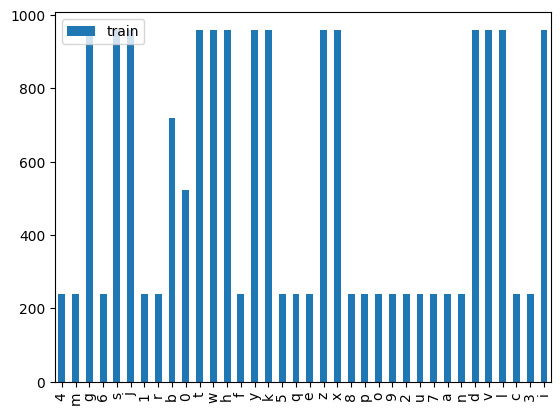

In [9]:
train_count.transpose().plot(kind='bar')

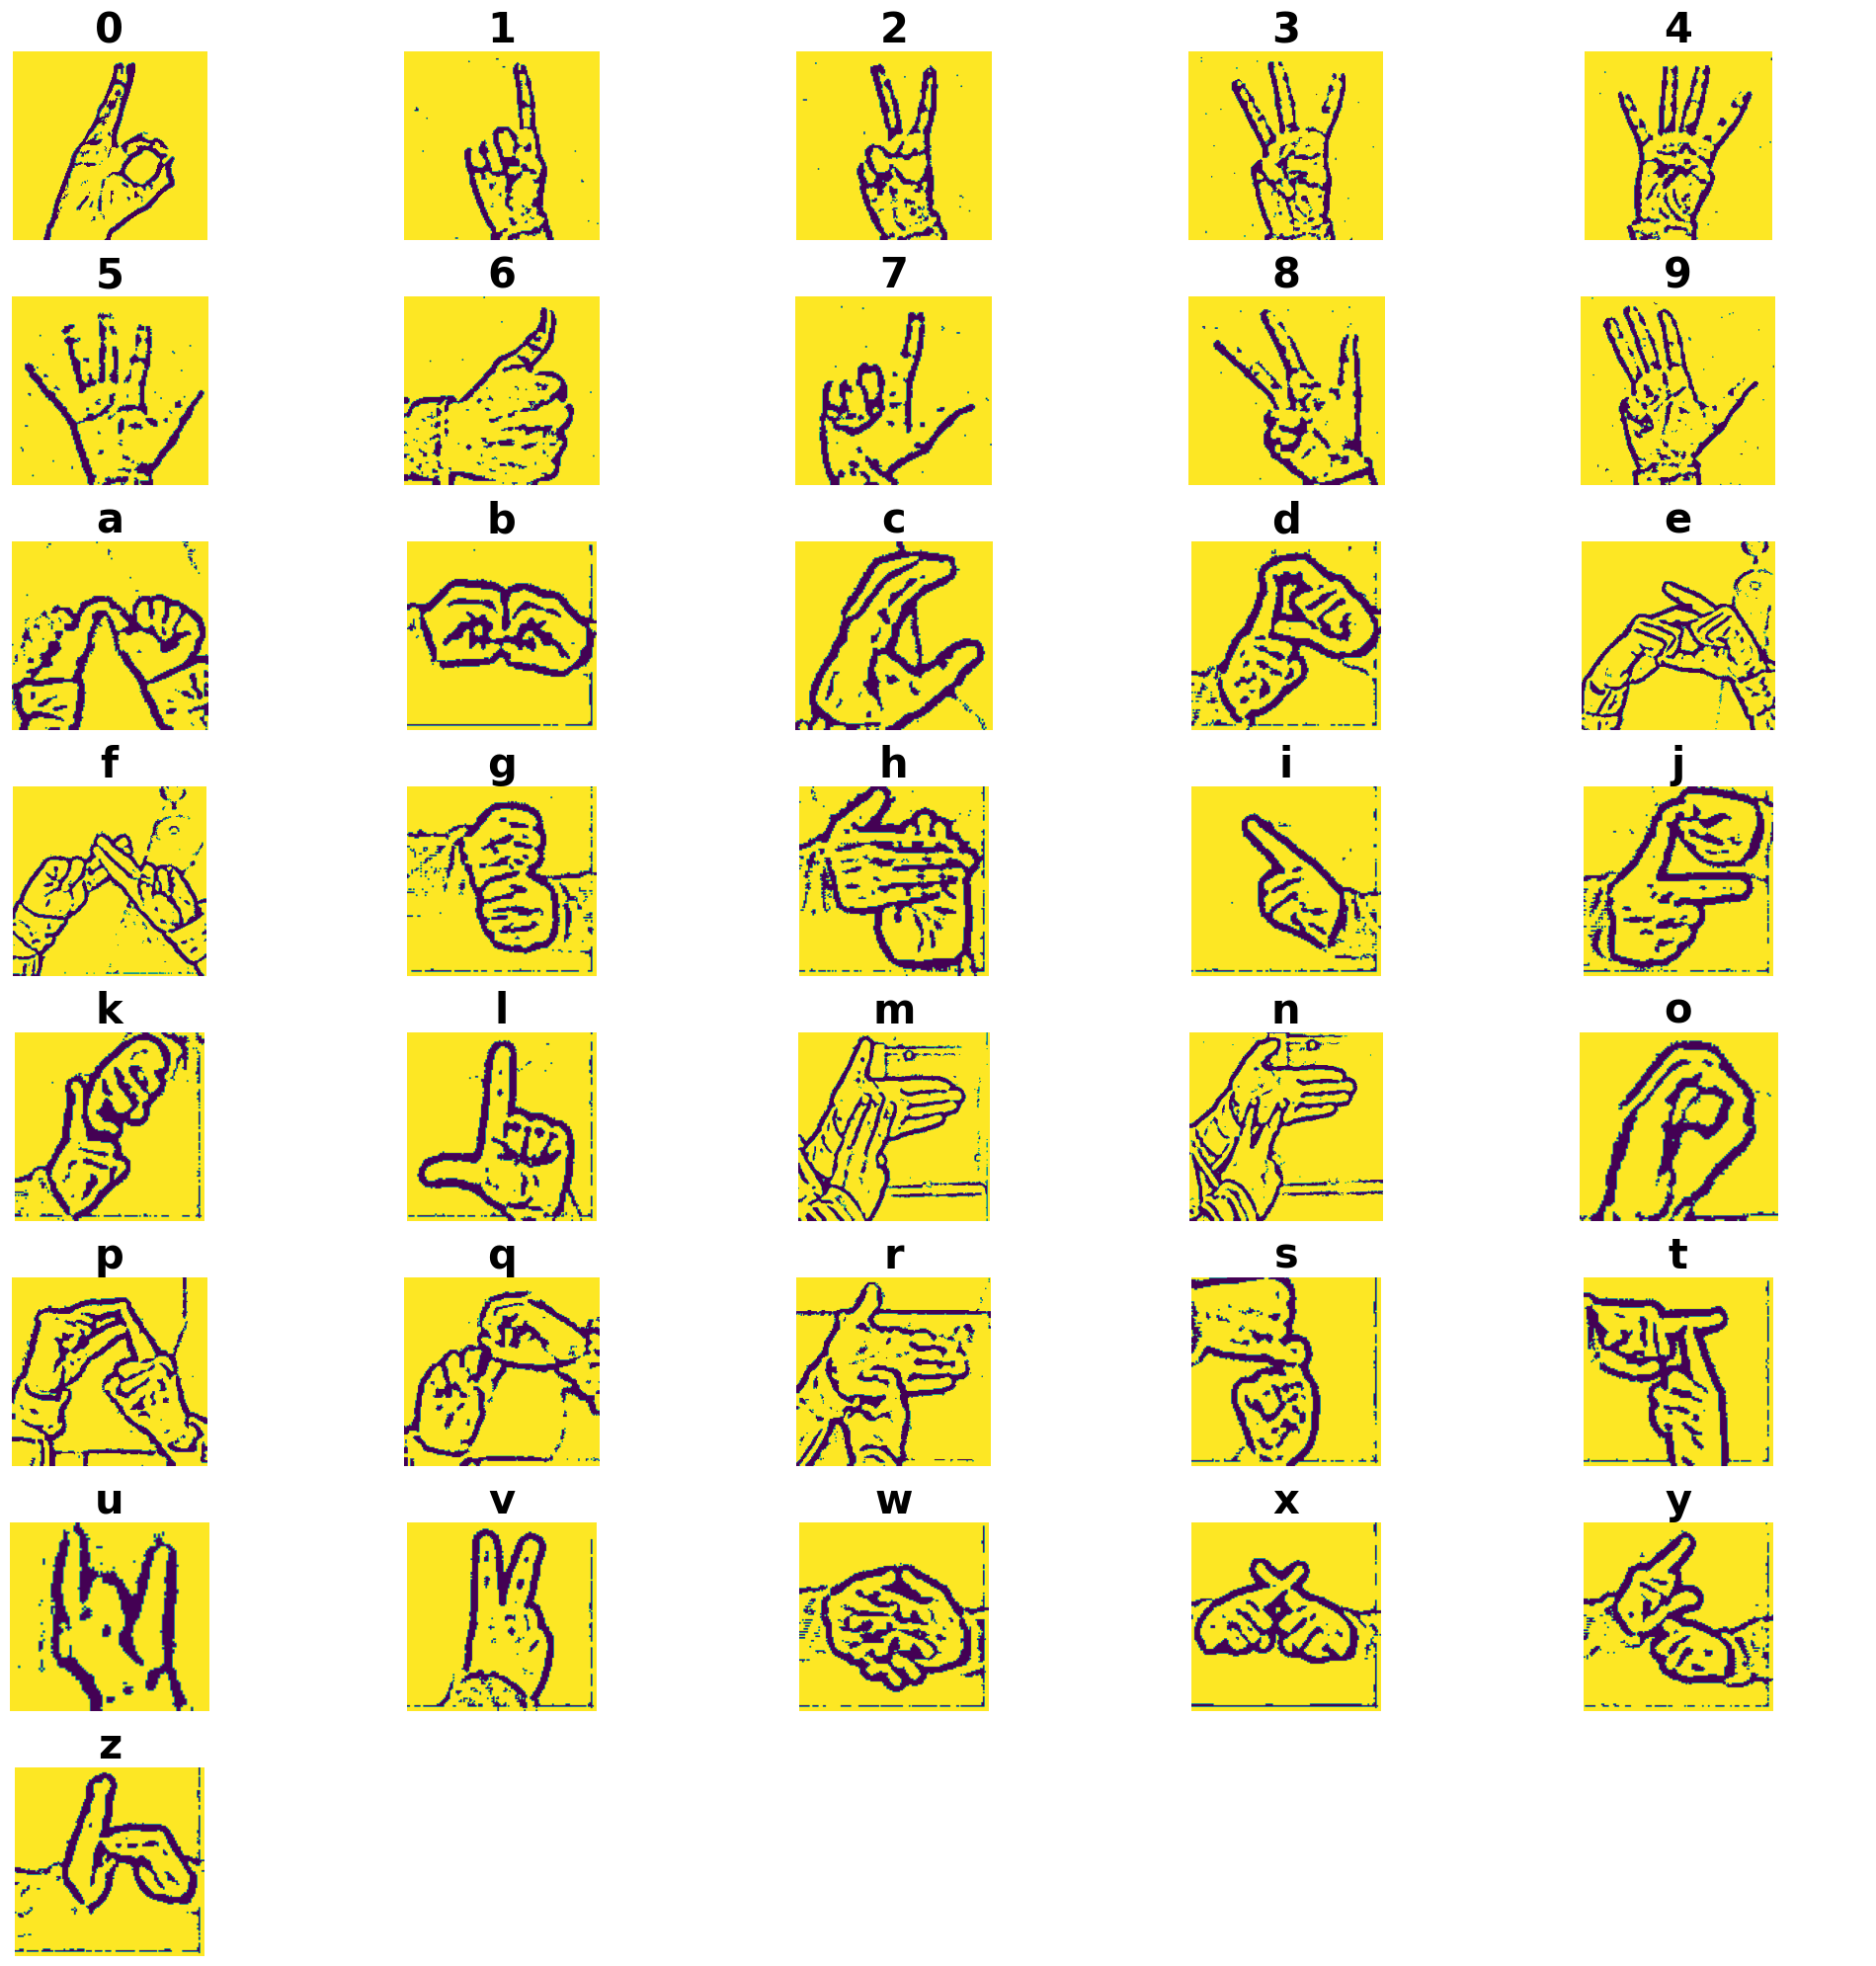

In [10]:
train_dir = train_dir

# Get the list of labels (subdirectories in the train directory)
labels = sorted(os.listdir(train_dir))

# Set up the plot
fig, axes = plt.subplots(nrows=len(labels)//5 + 1, ncols=5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each label and plot one image per label
for ax, label in zip(axes, labels):
    # Get the path to the label directory
    label_dir = os.path.join(train_dir, label)

    # Get the list of image files in the label directory
    image_files = os.listdir(label_dir)

    # Select the first image file
    image_path = label_dir + '/' + image_files[0]

    # Load and plot the image
    image = mpimg.imread(image_path)
    ax.imshow(image)
    ax.set_title(label,fontsize=30,fontweight='bold')
    ax.axis('off')

# Hide any remaining empty subplots
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(28, activation='softmax')(x)  # 28 classes for the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 25,691,676 (98.01 MB)

 Trainable params: 25,646,236 (97.83 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [31]:
train_dir = train_dir

train_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

history = model.fit(train_generator, epochs=5)

Found 19483 images belonging to 36 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


609/609 ━━━━━━━━━━━━━━━━━━━━ 193s 242ms/step - accuracy: 0.0146 - loss: nan
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 165s 213ms/step - accuracy: 0.0100 - loss: nan
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 213ms/step - accuracy: 0.0127 - loss: nan
Epoch 4/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 212ms/step - accuracy: 0.0138 - loss: nan
Epoch 5/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 212ms/step - accuracy: 0.0118 - loss: nan


In [32]:
test_dir = os.path.join(base_dir, "test")
test_datagen = ImageDataGenerator()

# Set batch size
batch_size = 32

# Create the test data generator
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

Found 4872 images belonging to 36 classes.
153/153 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.0118 - loss: nan
Test loss: nan
Test accuracy: 0.012315270490944386


In [33]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

609/609 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.0125 - loss: nan
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.0115 - loss: nan
final train accuracy = 1.23 , validation accuracy = 1.23


In [34]:
model.save("Resnet_model_version_2.h5")